# 형태소 기반 토큰화를 이용, 한국어 사전 만들기

## 1. 설치 및 다운로드

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

# #터미널
# wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
# mkdir -p ~/aiffel/sp_tokenizer/data
# mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
# cd ~/aiffel/sp_tokenizer/data
# tar -xzvf korean-english-park.train.tar.gz

## 2. 데이터 다운로드 및 분석 (환경 구성)

In [3]:
import os  # 운영체제와 상호작용하기 위한 모듈 (환경 변수, 파일 경로 등)

# 환경 변수 'HOME'을 기준으로 파일 경로를 구성
# 예: '/root/aiffel/sp_tokenizer/data/korean-english-park.train.ko'
path_to_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

# 지정된 파일을 읽고 줄 단위로 나눠서 리스트로 저장
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()  # 줄 끝의 개행 문자 제거한 채로 각 줄을 요소로 저장

# 전체 문장 수 출력
print("Data Size:", len(raw))

# 예시 문장 출력
print("Example:")
for sen in raw[0:100][::20]:  # 처음 100개 문장에서 20개 간격으로 추출
    print(">>", sen)  # 예시 문장 출력


Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


## 한글 사전 만들 때 참고 자료 
## jungyeul/korean-parallel-corpora

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


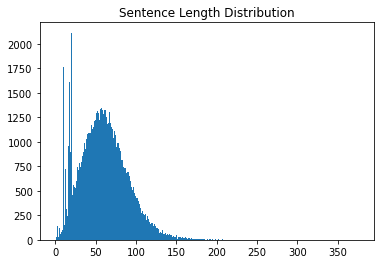

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
# 최단 길이 1, 최장 길이 377... 그리고 제법 그럴듯한 막대그래프가 나왔습니다만, 이 결과를 확인하고 드는 생각은 아래와 크게 다르지 않으실 거예요..!

# 1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?

# 2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?

# 3) 어디서부터 어디까지 잘라서 쓰지?

# 궁금증을 하나하나 해결해 봅시다! 대체 길이가 1인 문장은 뭘까요?

# 길이가 특정 값(length)인 문장을 출력하는 함수 정의
def check_sentence_with_length(raw, length):
    count = 0  # 출력한 문장 개수를 저장하는 변수 초기화
    
    for sen in raw:  # 말뭉치(raw)의 각 문장을 반복
        if len(sen) == length:  # 문장의 길이가 지정한 length와 같다면
            print(sen)  # 해당 문장 출력
            count += 1  # 출력한 문장 수 증가
            if count > 100:  # 100개를 초과하면 함수 종료
                return

# 길이가 1인 문장을 찾아서 최대 100개까지 출력
check_sentence_with_length(raw, 1)


’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [8]:
check_sentence_with_length(raw, 19)

성공할 수 있는 일들이 있습니다."
두번째 목적은 상품을 파는 것이다.
그것들은 무엇을 하기 위한 것인가?
- 어째서 그렇게 대단한 것입니까?
불매운동가들의 시선을 끌고 싶은가?
그리고 우리는 계속해서 외식을 하며
(나는 그가 정직하다고 생각한다.)
박스데일도 동일한 기법을 사용한다.
"우리는 전속력으로 달려야 합니다.
수익은 연 25%씩 늘어나고 있다.
미국인 반체제 인사 해리 우의 운명
국가를 위해 좋은 일이 될 것이라고
무역 적자는 무역 흑자로 돌아섰으며
경찰에서조차 수사를 벌이고 있습니다
다음 번이 3월1일로 예정되어있다.
우리는 허구적인 시대에 살고 있다.
모 아니면 도였지요’’라고 말했다.
이씨는 짧았던 결혼을 세 번 했다.
하지만 성인이 되려면 아직 멀었다.
양국은 상호 3위의 교역상대국이다.
어떻게 지속적인 동기부여를 받느냐?
편지는 의사소통 이상의 일을 한다.
식량 부족으로 고통받는 북한 주민들
그는 뉴욕 금융지구에 살고 있었다.
6. “교회에 열심히 나가는가요?”
신문사가 발견된 기밀문서를 받았다.
3.인맥을 두루 갖춰놓지 못하는 것
15.면접 질문에 집중하지 않는 것
20.월급 이야기를 일찍 꺼내는 것
디아즈는 진지해지려고 하지 않는다.
전갈은 월마트 직원에 의해 잡혔다.
4.여성은 증상을 스스로 진단한다.
당시 휴스는 "나는 다스 베이더다!
회사에 대해 약간의 조사를 한다.:
스폰지에 물을 묻혀 청소해도 된다.
그러나 이를 뒷받침할 증거는 없다.
그는 올해 가을 손자를 보게 된다.
린은 칼을 이용해 쓰레기를 뒤진다.
거주지가 소아과 병원 인근일 경우.
언제든 메모해 두고 가지고 다닌다.
대법원의 심리는 6일부터 시작됐다.
* 원하는 가격에 흥정을 하는 방법
그는 치료 중이던 26일 사망했다.
무샤라프 대통령은 참석하지 않았다.
이미 경영진 2500명이 해임됐다.
스피처는 3명의 자녀를 두고 있다.
이들은 보통 10일 내로 사망한다.
그는 “왜 대통령이 되려 하느냐?”
* 뗏목, 카누등을 타고 구경할 때
유대인연합은 법원 결정을 환영했다.


Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


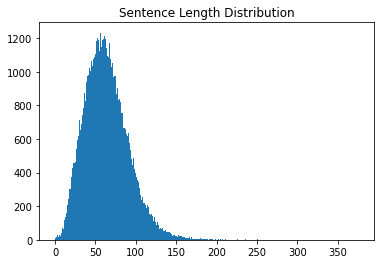

In [9]:
#중복 제거는 Python의 기본 자료형 set을 활용 - 
#대신 list의 순서가 뒤죽박죽될 수 있으니, 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용

import numpy as np
import matplotlib.pyplot as plt

# 변수 초기화
min_len = 999  # 최단 문장 길이 초기값 (임의로 큰 값으로 설정)
max_len = 0    # 최장 문장 길이 초기값
sum_len = 0    # 전체 문장 길이 합계

# 중복 문장 제거 (set으로 변환 후 다시 list로 변환)
cleaned_corpus = list(set(raw))  
print("Data Size:", len(cleaned_corpus))  # 중복 제거 후 문장 수 출력

# 각 문장의 길이를 순회하며 최단/최장/평균 길이를 계산
for sen in cleaned_corpus:
    length = len(sen)  # 문장 길이
    if min_len > length: min_len = length  # 최단 길이 갱신
    if max_len < length: max_len = length  # 최장 길이 갱신
    sum_len += length  # 전체 길이 누적

# 결과 출력
print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))  # 평균 길이 (정수 나눗셈)

# 문장 길이 분포를 저장할 배열 (길이 1 ~ max_len)
sentence_length = np.zeros((max_len), dtype=int)

# 각 문장의 길이를 기준으로 카운트
for sen in cleaned_corpus:
    sentence_length[len(sen)-1] += 1  # 길이 i인 문장은 인덱스 i-1에 카운트

# 시각화: 문장 길이 분포 히스토그램
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")  # 그래프 제목
plt.show()


## 전체 데이터를 사용하는 것은 비효율적:
* 가장 긴 문장에 맞춰 padding 해야 하므로, 메모리 사용량과 연산 시간이 급증함 (예: 3.7배 이상).
* 길이 기준 필터링 제안:
- 150자 이상 문장 제거: 과도한 padding 방지.
- 10자 미만 문장 제거: 너무 짧은 문장은 노이즈 가능성이 높음.
* 미니 배치 구성 시 주의점:
- 길이순 정렬은 padding은 줄이지만 데이터 섞임(randomness)에 편향을 유발할 수 있어 지양. 따라서 길이 10 이상 150 미만의 문장만 사용하고, 최종 데이터 분포를 확인할 예정.

## Padding이란?
- Padding(패딩)은 자연어 처리(NLP)에서 문장마다 길이가 다르기 때문에, 모든 문장의 길이를 동일하게 맞추기 위해 짧은 문장에 특별한 토큰(예: 0)을 추가하는 작업.



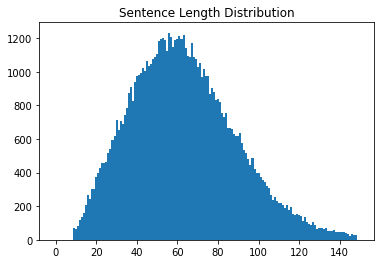

In [10]:
max_len = 150  # 최대 문장 길이 기준 (150자 미만만 사용)
min_len = 10   # 최소 문장 길이 기준 (10자 이상만 사용)

# 길이 조건에 맞는 문장만 필터링
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 문장 길이별 분포를 다시 초기화
sentence_length = np.zeros((max_len), dtype=int)  # 길이 1~149까지의 카운트를 위한 배열

# 필터링된 말뭉치를 기반으로 길이별 문장 수 카운팅
for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1  # 길이 i 문장은 인덱스 i-1에 기록

# 시각화: 히스토그램 형태로 문장 길이 분포 그리기
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")  # 그래프 제목
plt.show()


## 3. 공백 기반 토큰화 실습 및 문제점 확인


In [11]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List (ex: 형태소 분석 또는 띄어쓰기 단위 문장 리스트)
    # Tokenizer 객체 생성: 문자 필터링 설정 없음 (filters='')
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')  
    
    # 말뭉치 전체를 기반으로 단어 사전(word index) 생성
    tokenizer.fit_on_texts(corpus)

    # 각 문장을 정수 시퀀스로 변환 (단어 → 고유 번호)
    tensor = tokenizer.texts_to_sequences(corpus)

    # 각 문장의 길이를 맞추기 위해 post-padding 적용 (뒤에 0 채움)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    # 전처리된 정수 시퀀스(tensor)와 tokenizer 객체 반환
    return tensor, tokenizer

In [12]:
split_corpus = []  # 토큰화된 문장을 저장할 리스트 초기화

for kor in filtered_corpus:  # 필터링된 문장들을 하나씩 반복
    split_corpus.append(kor.split())  # 띄어쓰기 기준으로 단어 분할하여 저장

In [13]:
# ✅ tokenize 함수는 정수 시퀀스(tensor)와 tokenizer 객체를 반환
split_tensor, split_tokenizer = tokenize(split_corpus)

# ✅ 전체 어휘 사전에 포함된 단어 수 출력
print("Split Vocab Size:", len(split_tokenizer.index_word))


Split Vocab Size: 237435


In [14]:
# 단어 사전 (word → index)에서 인덱스와 단어를 출력
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)  # idx는 enumerate로 붙인 순서, word는 실제 단어 key

    if idx > 10:  # 처음 11개까지만 출력
        break


0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


## 4. 형태소 기반 토큰화 (KoNLPy, 그 중에서도 가장 성능이 준수한 MeCab클래스 활용 및 실습)


In [15]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


https://aiopen.etri.re.kr/bertModel
앞서 실습했던 공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인하셨을 겁니다. 이는 곧 연산량의 감소로 이어져 더 빠른 학습을 가능케 하고, 심지어 모델이 튜닝해야 하는 매개변수(Parameter) 수가 줄어들어 학습도 더 잘 된답니다! 적어도 한국어를 처리할 때는 공백 기반 토큰화를 절대 지양하셔야 해요!

WordPiece는 빈도 기반의 통계적 패턴만 반영된 단순 Subword 토크나이저로, 언어의 문법이나 의미 정보는 반영하지 않음.
반면, 정확한 형태소 분석기는 문법과 의미를 고려하므로, Subword 기반 토크나이저보다 더 높은 성능을 낼 수 있음.
그러나 형태소 분석기는 지속적인 유지보수와 언어별 전문성이 필요함.

SentencePiece는:
언어에 중립적이며,
OOV(Out-of-Vocabulary) 문제에 강하고,
혼합 언어 텍스트 처리에 유리함.
별도의 언어 지식 없이 쉽게 학습 가능하고,
대부분의 경우 언어 특화 토크나이저와 유사하거나 더 나은 성능을 보임.

* tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
* tokenizer.index_word 를 사용하여 Decoding

In [17]:
 
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

구 엔터 코로 지예 시장 대변인 은 2 일 , 클라우스 보베 라이트 시장 이 박물관 의 큐레이터 에게 보낸 서신 을 통해 히틀러 인형 의 전시 에 대해 재고 해 줄 것 과 전시 방법 에 대해 신중 하 게 결정 할 것 을 요구 했 다고 전했 다 .


In [18]:
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

구 엔터 코로 지예 시장 대변인 은 2 일 , 클라우스 보베 라이트 시장 이 박물관 의 큐레이터 에게 보낸 서신 을 통해 히틀러 인형 의 전시 에 대해 재고 해 줄 것 과 전시 방법 에 대해 신중 하 게 결정 할 것 을 요구 했 다고 전했 다 . 


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

vocab_size = len(split_tokenizer.word_index) + 1  # 패딩 포함
max_len = split_tensor.shape[1]  # 패딩된 시퀀스의 길이

model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    
    # CNN block: 문장에서 지역적 패턴(어절/구)을 감지
    layers.Conv1D(128, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 이진 분류
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 128)           30391808  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 128)           82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [26]:
import numpy as np

# mecab_tensor 또는 split_tensor의 길이만큼 0 또는 1 무작위로 생성
y = np.random.randint(0, 2, size=(len(split_tensor),))  # 예: 이진 분류용 라벨


In [27]:
from sklearn.model_selection import train_test_split

# 더미 y 생성 (예: 0/1)
# y = np.random.randint(0, 2, size=(len(split_tensor),))

# 혹은 이미 y가 있다면 아래처럼 사용
x_train, x_test, y_train, y_test = train_test_split(split_tensor, y, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
1539/1539 [==============================] - 31s 18ms/step - loss: 0.6935 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.4985
Epoch 2/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.6008 - accuracy: 0.6805 - val_loss: 0.7822 - val_accuracy: 0.5020
Epoch 3/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.0675 - accuracy: 0.9785 - val_loss: 1.2565 - val_accuracy: 0.5008
Epoch 4/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 2.3155 - val_accuracy: 0.4993
Epoch 5/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 2.9752 - val_accuracy: 0.4996
Epoch 6/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 3.3953 - val_accuracy: 0.5004
Epoch 7/10
1539/1539 [==============================] - 28s 18ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 3.8788 -

In [28]:
def show_history(history):
    history_dict = history.history  # 모델 학습 결과가 저장된 history 객체에서 딕셔너리 추출

    loss = history_dict['loss']  # 훈련 손실값
    val_loss = history_dict['val_loss']  # 검증 손실값

    epochs = range(1, len(loss) + 1)  # 에포크 수만큼 x축 값 생성 (1부터 시작)
    fig = plt.figure(figsize=(12, 5))  # 전체 그래프 크기 설정

    # 🔹 손실(loss) 그래프 그리기
    ax1 = fig.add_subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프 (왼쪽)
    ax1.plot(epochs, loss, 'b-', label='train_loss')  # 훈련 손실: 파란 선
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')  # 검증 손실: 빨간 선
    ax1.set_title('Train and Validation Loss')  # 그래프 제목
    ax1.set_xlabel('Epochs')  # x축 이름
    ax1.set_ylabel('Loss')  # y축 이름
    ax1.grid()  # 격자 추가
    ax1.legend()  # 범례 표시

    # 🔹 정확도(accuracy) 그래프 그리기
    accuracy = history_dict['accuracy']  # 훈련 정확도
    val_accuracy = history_dict['val_accuracy']  # 검증 정확도

    ax2 = fig.add_subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프 (오른쪽)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')  # 훈련 정확도: 파란 선
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')  # 검증 정확도: 빨간 선
    ax2.set_title('Train and Validation Accuracy')  # 그래프 제목
    ax2.set_xlabel('Epochs')  # x축 이름
    ax2.set_ylabel('Accuracy')  # y축 이름
    ax2.grid()  # 격자 추가
    ax2.legend()  # 범례 표시

    plt.show()  # 최종적으로 그래프 출력

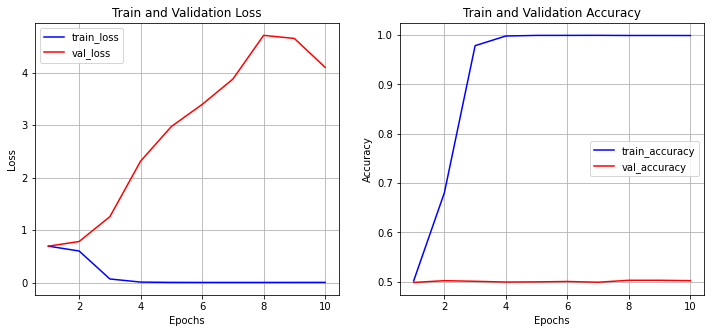

In [29]:
show_history(history)


In [30]:
model.evaluate(x_test, y_test)

481/481 [==============================] - 1s 2ms/step - loss: 4.1285 - accuracy: 0.4964


[4.1285080909729, 0.4964244067668915]

# 과적합

In [31]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),

    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [33]:
from sklearn.model_selection import train_test_split

# 1단계: 먼저 전체를 train+val / test로 분할 (20%는 test)
x_temp, x_test, y_temp, y_test = train_test_split(mecab_tensor, y, test_size=0.2, random_state=42)

# 2단계: train+val에서 다시 train / val 분할 (val 비율 25% → 전체의 20%)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


In [34]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)


Epoch 1/20
721/721 [==============================] - 20s 25ms/step - loss: 0.7552 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 2/20
721/721 [==============================] - 18s 24ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/20
721/721 [==============================] - 18s 24ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 4/20
721/721 [==============================] - 18s 24ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 5/20
721/721 [==============================] - 18s 25ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 6/20
721/721 [==============================] - 18s 24ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4983


In [35]:
model.evaluate(x_test, y_test)

481/481 [==============================] - 2s 4ms/step - loss: 0.6931 - accuracy: 0.5027


[0.693134069442749, 0.5026654601097107]

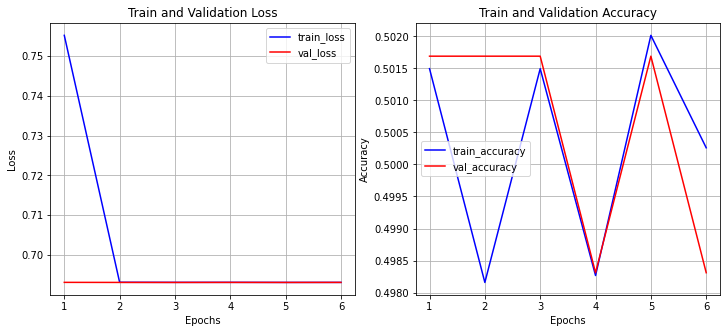

In [36]:
show_history(history)
